# Validation notebook of 4-VSC system (GridFollowing): Stepss vs Dynawo
# RMS simulation results for different scenarios

## <center> Simulation setup </center>
| | Stepss | Dynawo |
|-| :---: | :---: |
| Duration | 10s | 10s |
| Time step | 1ms (fix) | 10us-10ms (variable) |
| Solver solution method | DAE | DAE (IDA) |
| Solver integration method | Backward Differentiation Formula (order2) | IDA |

## Plotting Function

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget

In [2]:
def plot_results(scenario, stepss_file, dynawo_file):

    stepss = pd.read_csv(stepss_file, sep = '\s+', comment=";", keep_default_na=False, names=('time', 'BUS_A', 'BUS_B', 'BUS_C', 'BUS_E', 'BUS_F'))
    dynawo= pd.read_csv(dynawo_file, sep = ';')

        
    stepss_variables= ['BUS_A', 'BUS_B', 'BUS_E', 'BUS_F']
    dynawo_variables= ['NETWORK__BUS__A_TN_Upu_value', 'NETWORK__BUS__B_TN_Upu_value', 'NETWORK__BUS__E_TN_Upu_value', 'NETWORK__BUS__F_TN_Upu_value']
    labels= ['Bus A Vpcc (p.u)', 'Bus B Vpcc (p.u)', 'Bus E Vpcc (p.u)', 'Bus F Vpcc (p.u)']

    plt.close('all')
    plt.figure(figsize=(15, 12))
    plt.suptitle(scenario , fontsize=16)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    
    for n, (x, y, l) in enumerate(zip(stepss_variables, dynawo_variables, labels)):
        ax = plt.subplot(2, 2, n + 1)
        ax.plot(stepss['time'], stepss[x], color= 'black', linestyle='-', label='Stepss')
        ax.plot(dynawo['time'], dynawo[y], color= 'tab:green', linestyle='-.', label='Dynawo')

        # ax.set_xlim([4, 7])
        # ax.set_ylim([min(min(stepss[x]), min(dynawo[y]))- 0.01, max(max(stepss[x]), max(dynawo[y]))+ 0.01])
        
        ax.set_title(l, fontsize=14)
        ax.set_ylabel(l, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)
        ax.legend(fontsize=14, loc="lower right")
        ax.legend(fontsize=14, loc="upper right")


## Operating Point 1

### Event: Mild disturbance: line disconnection A-B Line 2

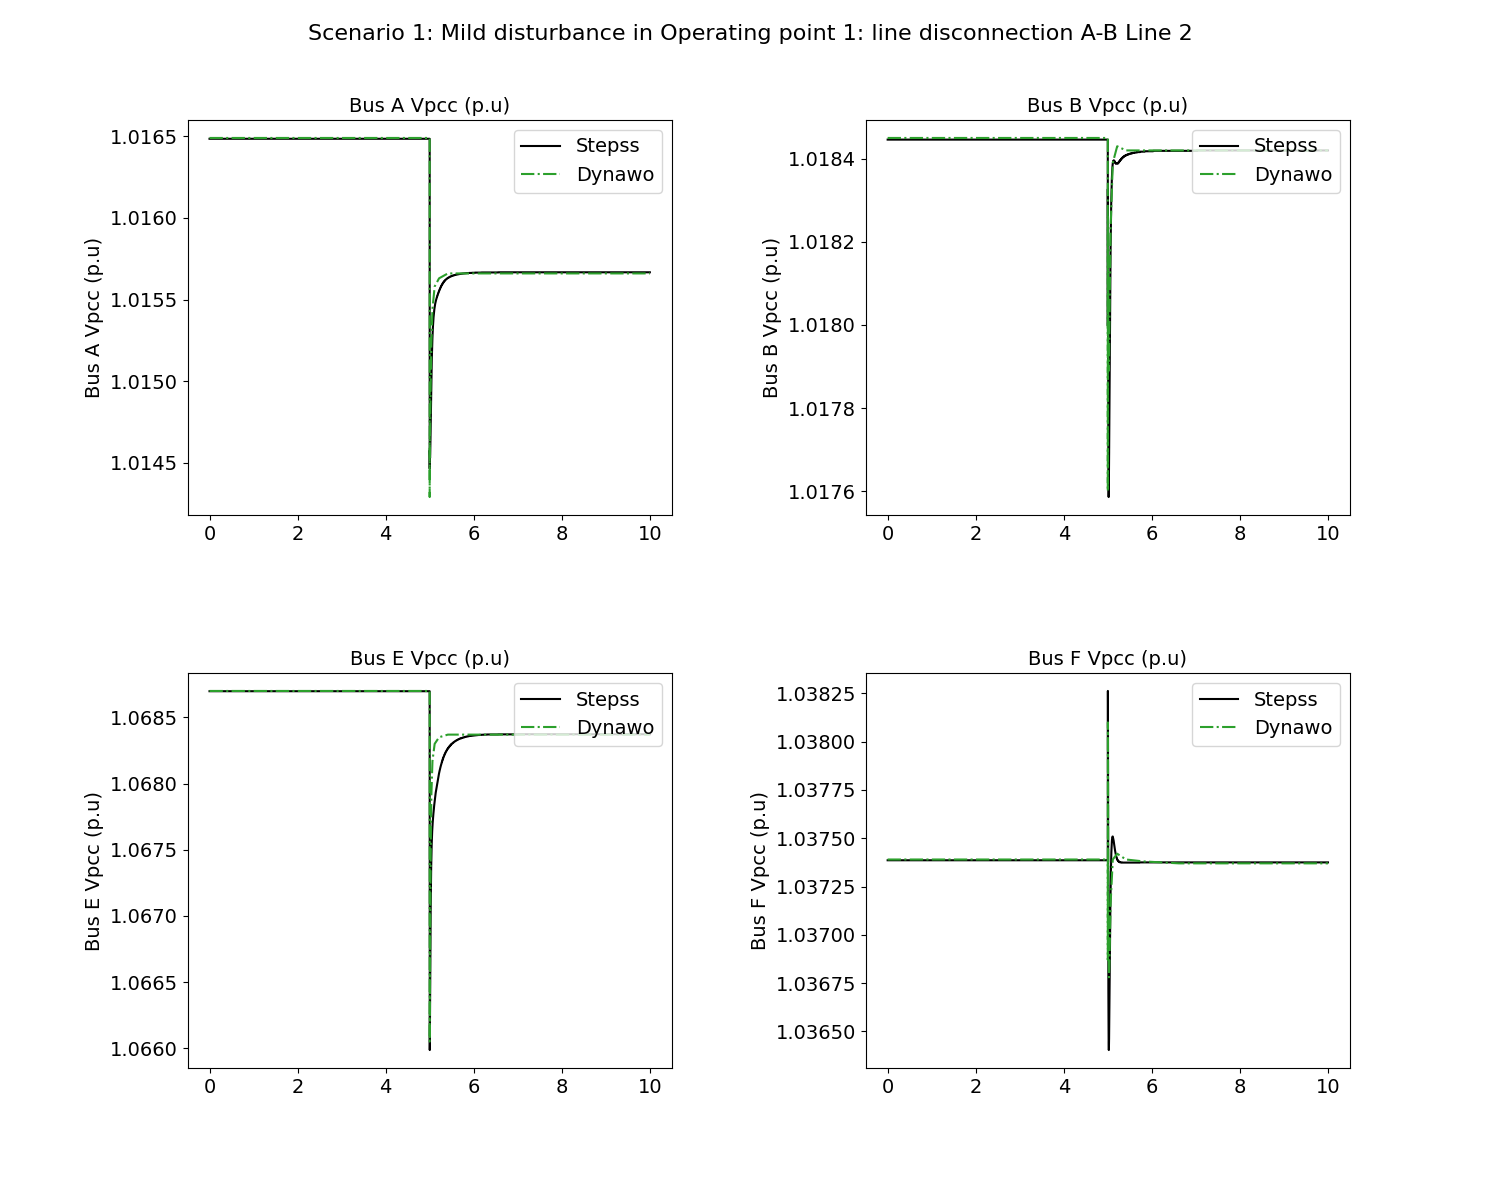

In [3]:
plot_results('Scenario 1: Mild disturbance in Operating point 1: line disconnection A-B Line 2',
             './results/4VSC/OP1_DisconnectLine/stepss.csv',
             './results/4VSC/OP1_DisconnectLine/dynawo.csv')

### Event: Severe disturbance: fault Bus A (t=100ms)

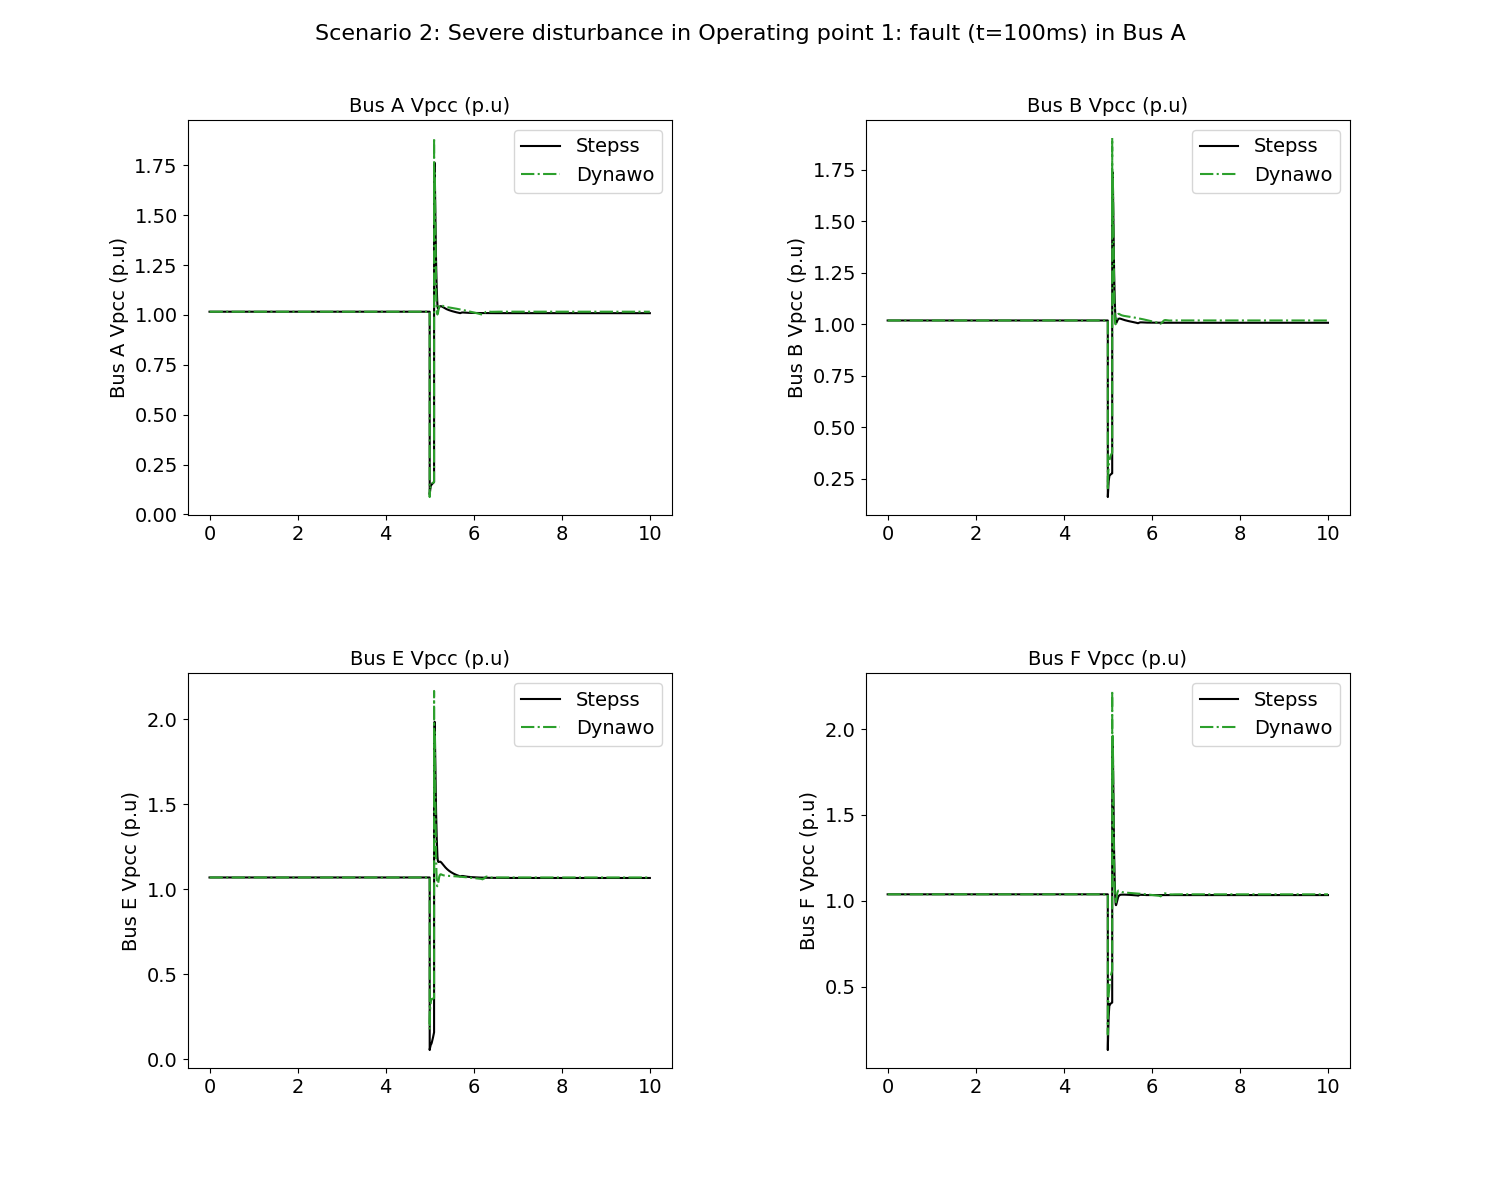

In [4]:
plot_results('Scenario 2: Severe disturbance in Operating point 1: fault (t=100ms) in Bus A',
             './results/4VSC/OP1_Fault/stepss.csv', #fault impedance: X=0.001 p.u. (1.6 Ohm)
             './results/4VSC/OP1_Fault/dynawo.csv') #fault impedance: X=0.001 p.u.

## Operating Point 2

### Event: Mild disturbance: line disconnection A-B Line 2

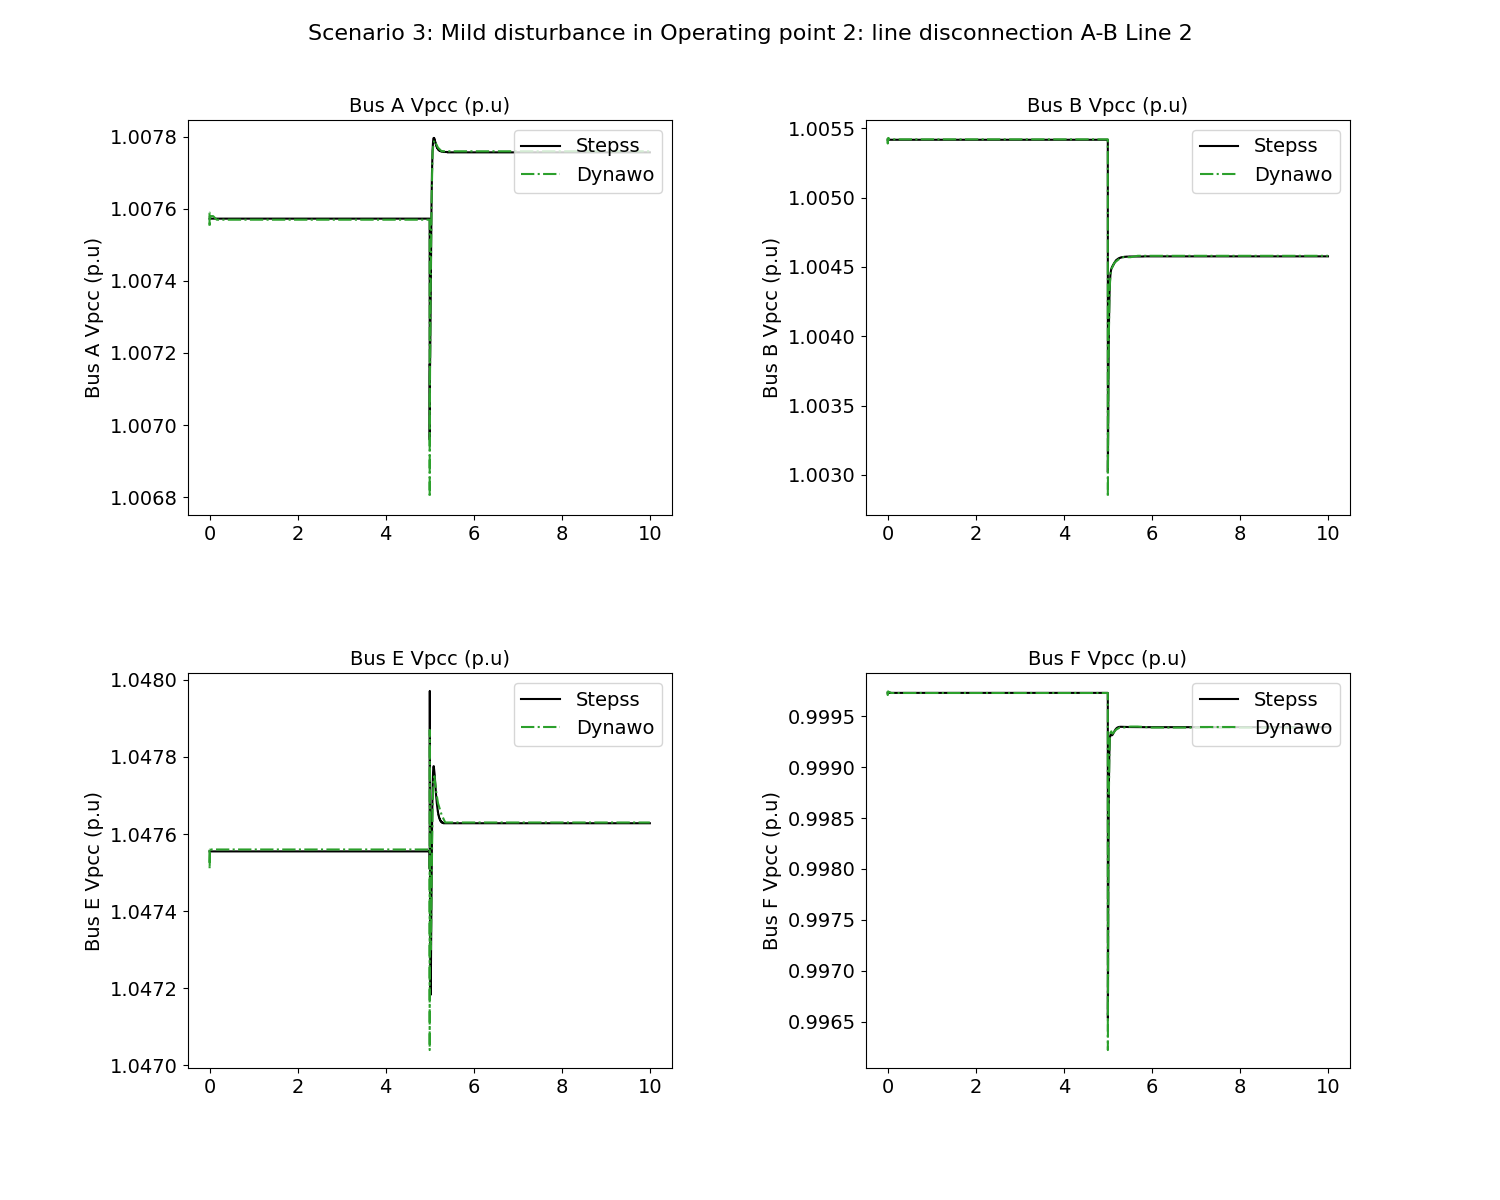

In [8]:
plot_results('Scenario 3: Mild disturbance in Operating point 2: line disconnection A-B Line 2',
             './results/4VSC/OP2_DisconnectLine/stepss.csv',
             './results/4VSC/OP2_DisconnectLine/dynawo.csv')

### Event: Severe disturbance: fault Bus A (t=100ms)

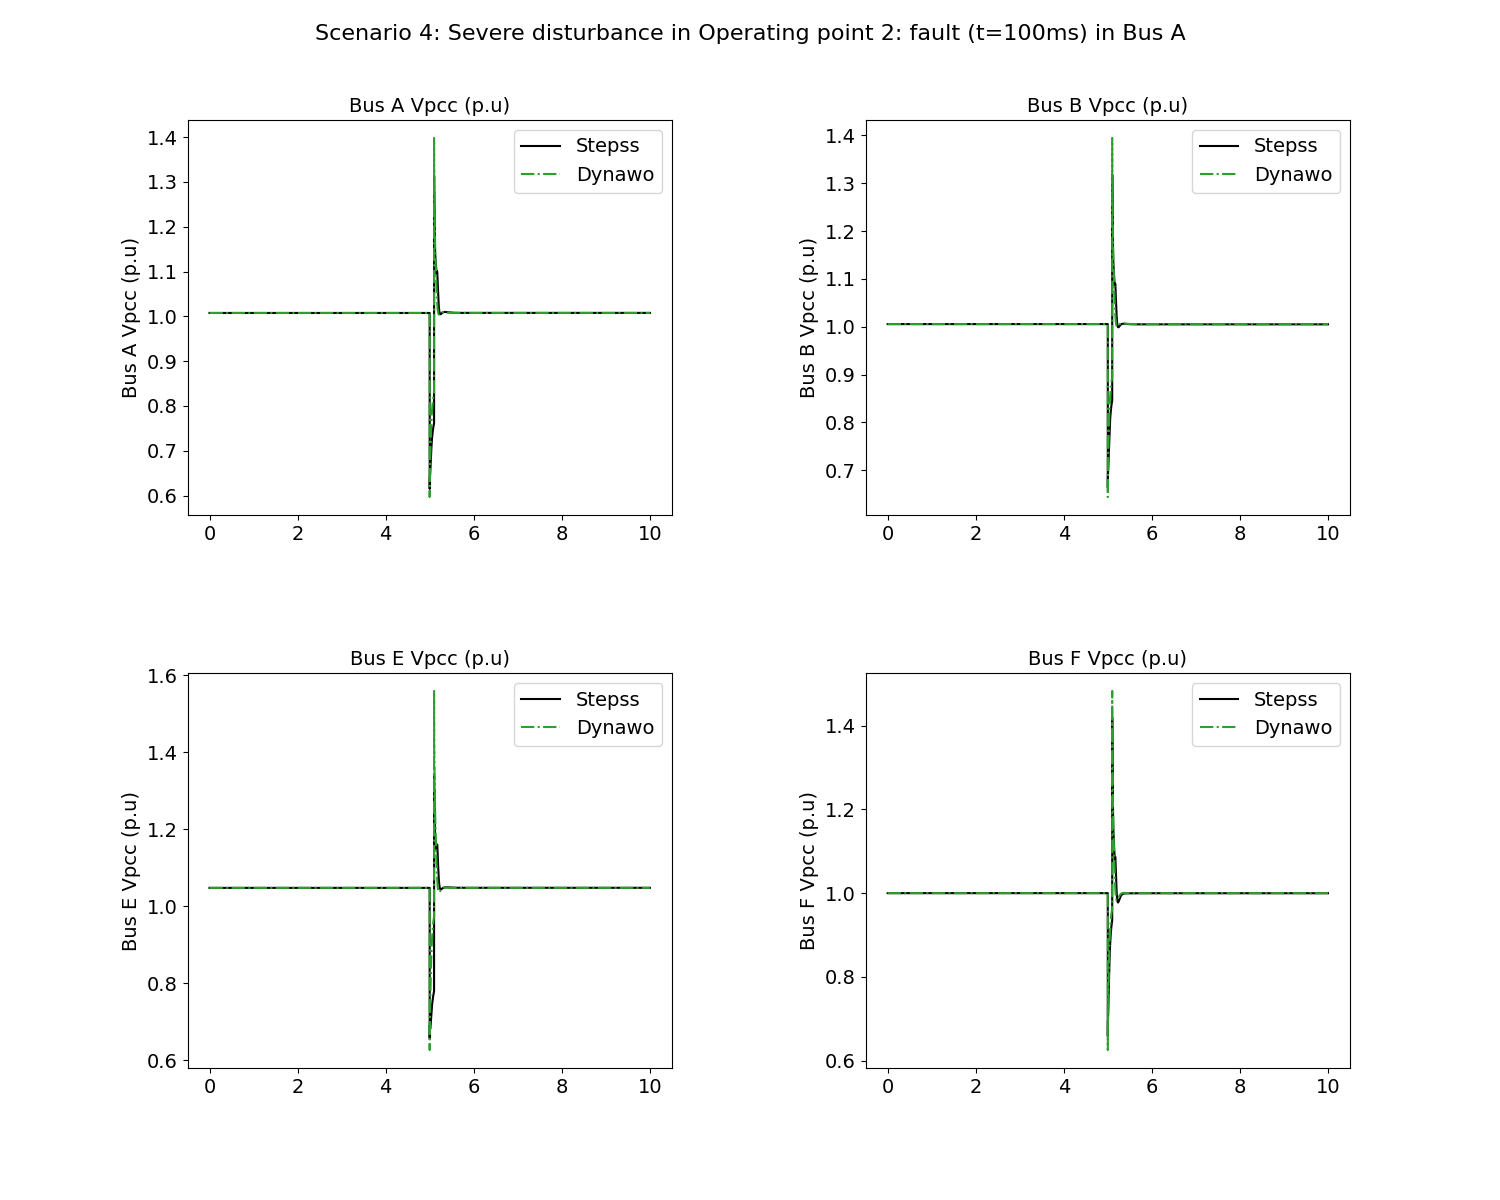

In [6]:
plot_results('Scenario 4: Severe disturbance in Operating point 2: fault (t=100ms) in Bus A',
             './results/4VSC/OP2_Fault/stepss.csv', #fault impedance: X=0.015 p.u. (24 Ohm)
             './results/4VSC/OP2_Fault/dynawo.csv') #fault impedance: X=0.015 p.u.